In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##Tratamento de Missings

In [3]:
df_hatco = pd.read_csv('hatco_csv.csv', sep =';', decimal = ',')
df_hatco.head()

,id,velocidade_entrega,nivel_preco,flexibilidade_preco,imagem_fornecedor,qualidade_servico,imagem_forca_vendas,qualidade_produto,tamanho_firma,nivel_uso,nivel_satisfacao,area_industria
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,pequena,32.0,4.2,industria
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,grande,43.0,4.3,outra_area
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,grande,48.0,5.2,industria
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,grande,32.0,3.9,industria
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,pequena,58.0,6.8,industria


In [4]:
df_hatco.tail()

,id,velocidade_entrega,nivel_preco,flexibilidade_preco,imagem_fornecedor,qualidade_servico,imagem_forca_vendas,qualidade_produto,tamanho_firma,nivel_uso,nivel_satisfacao,area_industria
165,266,4.2,2.4,9.4,4.9,3.2,2.7,8.5,pequena,49.0,5.2,industria
166,267,3.8,0.8,NaN,NaN,2.2,2.6,5.3,pequena,42.0,5.1,outra_area
167,268,3.3,2.6,9.7,3.3,2.9,1.5,5.2,pequena,47.0,NaN,industria
168,269,NaN,1.9,NaN,4.5,1.5,3.1,9.9,grande,39.0,3.3,industria
169,270,4.5,1.6,8.7,4.6,3.1,2.1,6.8,pequena,56.0,5.1,outra_area


Entedimento do numero missing por linha

In [5]:
missings_por_linha = pd.DataFrame({'id': df_hatco['id'].tolist(),
                                   'n_missings' : df_hatco.isna().sum(axis=1).tolist()})


In [6]:
missings_por_linha

,id,n_missings
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
165,266,0
166,267,2
167,268,1
168,269,2


In [7]:
n_colunas = df_hatco.shape[1] -1
n_colunas

11

Calculo do percentual

In [8]:
missings_por_linha \
    .assign( perc_missings = missings_por_linha['n_missings'] / n_colunas ) \
    .sort_values('perc_missings', ascending = False) \
    .head(10)

,id,n_missings,perc_missings
109,210,7,0.636364
162,263,7,0.636364
160,261,6,0.545455
113,214,6,0.545455
132,233,5,0.454545
144,245,5,0.454545
123,224,3,0.272727
103,204,3,0.272727
120,221,3,0.272727
106,207,3,0.272727


In [9]:
missings_por_coluna = df_hatco.isna().sum()
missings_por_coluna

id                      0
velocidade_entrega     21
nivel_preco            13
flexibilidade_preco    17
imagem_fornecedor       7
qualidade_servico       9
imagem_forca_vendas     6
qualidade_produto       9
tamanho_firma           2
nivel_uso               9
nivel_satisfacao        7
area_industria          1
dtype: int64

In [10]:
missings_por_coluna = pd.DataFrame(missings_por_coluna,
                                   columns=['n']) \
                                   .reset_index() \
                                   .rename(columns={'index': 'variaveis'})

In [11]:
missings_por_coluna

,variaveis,n
0,id,0
1,velocidade_entrega,21
2,nivel_preco,13
3,flexibilidade_preco,17
4,imagem_fornecedor,7
5,qualidade_servico,9
6,imagem_forca_vendas,6
7,qualidade_produto,9
8,tamanho_firma,2
9,nivel_uso,9


In [12]:
n_linhas = df_hatco.shape[0]
n_linhas

170

Vamos obter o missings por colunas/ linhas para buscarmos o % de missings

In [13]:
missings_por_coluna \
.assign( perc_missings = missings_por_coluna['n'] / n_linhas) \
.sort_values('n', ascending=False)

,variaveis,n,perc_missings
1,velocidade_entrega,21,0.123529
3,flexibilidade_preco,17,0.100000
2,nivel_preco,13,0.076471
5,qualidade_servico,9,0.052941
9,nivel_uso,9,0.052941
7,qualidade_produto,9,0.052941
10,nivel_satisfacao,7,0.041176
4,imagem_fornecedor,7,0.041176
6,imagem_forca_vendas,6,0.035294
8,tamanho_firma,2,0.011765


Outra forma é comparando as variáveis qualitativas

In [14]:
df_hatco['tamanho_firma'] \
    .value_counts(dropna=False) \
    .to_frame('n') \
    .reset_index() \
    .rename(columns={'index' : 'tamanho_frima'})

,tamanho_firma,n
0,pequena,103
1,grande,65
2,NaN,2


Tratamento de variáveis qualitativas (Comparação)

In [15]:
pd.crosstab(df_hatco.tamanho_firma.fillna('NA'),
            df_hatco.area_industria.fillna('NA'))

area_industria,NA,industria,outra_area
tamanho_firma,,,
NA,0,0,2
grande,1,32,32
pequena,0,51,52


Tratamento de variáveis quantitativas (Comparação)

In [16]:
df_hatco[['velocidade_entrega', 'qualidade_produto']].corr()

,velocidade_entrega,qualidade_produto
velocidade_entrega,1.000000,-0.404352
qualidade_produto,-0.404352,1.000000


Agora vamos atribuir o valo zero para os misisngs, para analisar se teremos muita diferença

In [17]:
df_hatco[['velocidade_entrega', 'qualidade_produto']].fillna(0).corr()

,velocidade_entrega,qualidade_produto
velocidade_entrega,1.00000,-0.12319
qualidade_produto,-0.12319,1.00000


Tratamento

Eliminação Missings

In [18]:
df_hatco.shape

(170, 12)

In [19]:
df_hatco \
.dropna() \
.shape

(126, 12)

Outra forma é colocar o valor mais frequente no missing value

In [20]:
df_hatco['area_industria'] \
.value_counts(dropna=False) \
.to_frame('n') \
.reset_index() \
.rename(columns={'index': 'area_industria'})

,area_industria,n
0,outra_area,86
1,industria,83
2,NaN,1


Vamos colocar OUTRA_AREA no lugar NAN, pois é o valor mais frequente

In [21]:
df_hatco['area_industria'] \
    .fillna('outra_area') \
    .value_counts(dropna=False) \
    .to_frame('n') \
    .reset_index() \
    .rename(columns={'index': 'area_industria'})

,area_industria,n
0,outra_area,87
1,industria,83


##Tratamento de Outliers

In [22]:
from sklearn.preprocessing import scale
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [23]:
df_creditos = pd.read_csv('dados_credito_small.csv', sep=',', decimal = '.')
df_creditos

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]"
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]"
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]"
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]"
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]"
...,...,...,...,...,...,...,...,...,...,...,...
495,496,47,2,4,33,7.1,1.15,nao_pagou,ensin_medio,acima_40,"(24,34]"
496,497,30,2,12,98,7.2,4.12,pagou,ensin_medio,abaixo_30,"(54,446]"
497,498,44,2,12,86,13.0,9.70,pagou,ensin_medio,acima_40,"(54,446]"
498,499,25,1,0,18,18.9,2.89,nao_pagou,ensin_basico,abaixo_30,"[14,24]"


Identificação

Vamos começar pelo score-Z

A funçao a seguir vai normalizar os dados, para que eles tenham uma média 0 e um desvio padrão 1, para deixar os valores dentro de uma escala, para tentar,os identificar algum outlier fora do nosso padrão. A maioria dos dados tem que estar entre 3 e -3, se algum valor ficar fora são possiveis candidatos a outliers.

In [26]:
df_creditos['outras_div_z'] = scale(df_creditos['outras_div'])
df_creditos

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,outras_div_z
0,1,41,3,18,176,10.3,0.598029,nao_pagou,ensin_sup,acima_40,"(54,446]",0.598029
1,2,27,1,10,31,17.3,0.293935,pagou,ensin_basico,abaixo_30,"(24,34]",0.293935
2,3,40,1,15,55,5.5,-0.257047,pagou,ensin_basico,entre_30_40,"(54,446]",-0.257047
3,4,41,1,15,120,2.9,-0.663509,pagou,ensin_basico,acima_40,"(54,446]",-0.663509
4,5,24,2,2,28,17.3,0.010917,nao_pagou,ensin_medio,abaixo_30,"(24,34]",0.010917
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,47,2,4,33,7.1,-0.564151,nao_pagou,ensin_medio,acima_40,"(24,34]",-0.564151
496,497,30,2,12,98,7.2,0.330065,pagou,ensin_medio,abaixo_30,"(54,446]",0.330065
497,498,44,2,12,86,13.0,2.010108,pagou,ensin_medio,acima_40,"(54,446]",2.010108
498,499,25,1,0,18,18.9,-0.040267,nao_pagou,ensin_basico,abaixo_30,"[14,24]",-0.040267


In [28]:
df_creditos[['outras_div', 'outras_div_z']].describe()

,outras_div,outras_div_z
count,5.000000e+02,5.000000e+02
mean,8.526513e-17,7.105427e-18
std,1.001002e+00,1.001002e+00
min,-8.953425e-01,-8.953425e-01
25%,-6.040447e-01,-6.040447e-01
50%,-3.247902e-01,-3.247902e-01
75%,1.930725e-01,1.930725e-01
max,7.227876e+00,7.227876e+00


A media tem que estar perto de 0 e o desvio padrao perto de 1, entao deu certo

In [29]:
df_creditos.sort_values('outras_div_z', ascending=False)

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,outras_div_z
343,344,40,3,5,220,16.0,7.227876,nao_pagou,ensin_sup,entre_30_40,"(54,446]",7.227876
466,467,47,3,16,221,17.6,6.044620,nao_pagou,ensin_sup,acima_40,"(54,446]",6.044620
491,492,41,3,13,91,25.2,5.297934,nao_pagou,ensin_sup,acima_40,"(54,446]",5.297934
478,479,51,2,27,166,11.5,4.590389,pagou,ensin_medio,acima_40,"(54,446]",4.590389
325,326,54,1,25,119,26.5,4.268230,nao_pagou,ensin_basico,acima_40,"(54,446]",4.268230
...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,25,1,9,18,1.2,-0.865234,pagou,ensin_basico,abaixo_30,"[14,24]",-0.865234
271,272,22,1,4,16,1.2,-0.877277,pagou,ensin_basico,abaixo_30,"[14,24]",-0.877277
76,77,24,1,2,21,0.6,-0.880288,pagou,ensin_basico,abaixo_30,"[14,24]",-0.880288
10,11,27,1,0,16,1.7,-0.883299,pagou,ensin_basico,abaixo_30,"[14,24]",-0.883299


Como mostra a df temos alguns outliers na coluna 'outras_div_z'

Agora método Bloxplot

<Axes: >

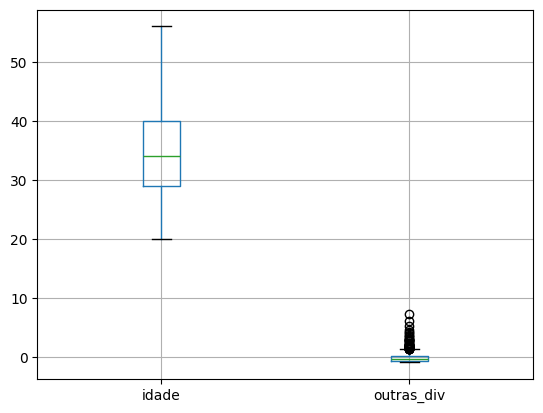

In [30]:
df_creditos[['idade', 'outras_div']].boxplot()

Não há outliers nas idades, porém na coluna outras_div sim

Vamos fazer um gráfico de dispersão

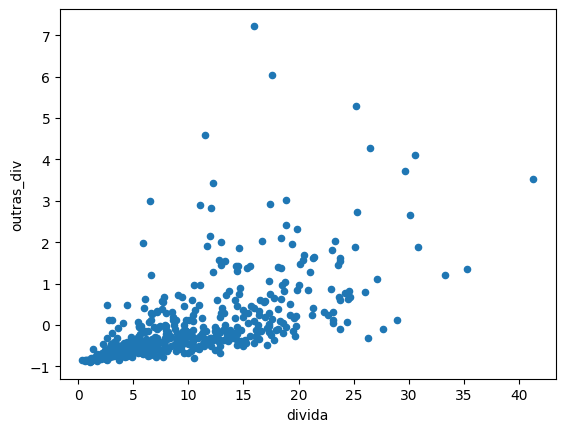

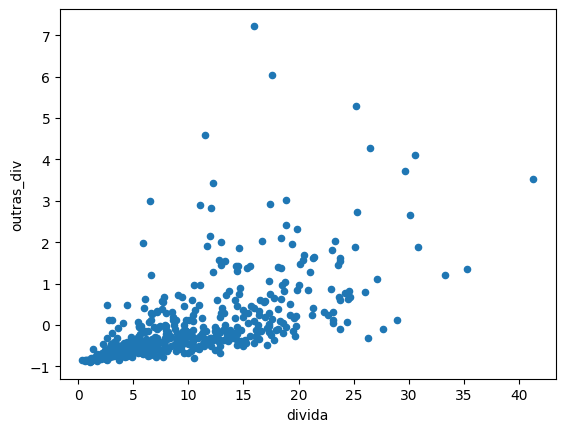

In [43]:
df_creditos.plot.scatter(x = 'divida', y = 'outras_div')
plt.show()

Identificamos alguns Outliers. Identificamos inclusive a possiblidade de clusterização, por isso vamos aplicar o método de 'Distancia de Mahalanobis'.

In [44]:
robust_cov = MinCovDet().fit(df_creditos[['idade', 'renda', 'divida']])

Agora vamos obter a distância

In [46]:
df_creditos['mahalanobis_d'] = robust_cov.mahalanobis(df_creditos[['idade', 'renda', 'divida']])

In [47]:
df_creditos.head()

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,outras_div_z,mahalanobis_d
0,1,41,3,18,176,10.3,0.598029,nao_pagou,ensin_sup,acima_40,"(54,446]",0.598029,169.682755
1,2,27,1,10,31,17.3,0.293935,pagou,ensin_basico,abaixo_30,"(24,34]",0.293935,2.972653
2,3,40,1,15,55,5.5,-0.257047,pagou,ensin_basico,entre_30_40,"(54,446]",-0.257047,3.812332
3,4,41,1,15,120,2.9,-0.663509,pagou,ensin_basico,acima_40,"(54,446]",-0.663509,58.834576
4,5,24,2,2,28,17.3,0.010917,nao_pagou,ensin_medio,abaixo_30,"(24,34]",0.010917,3.690308


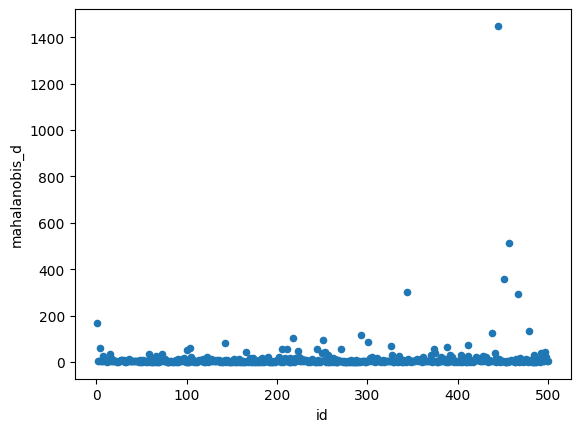

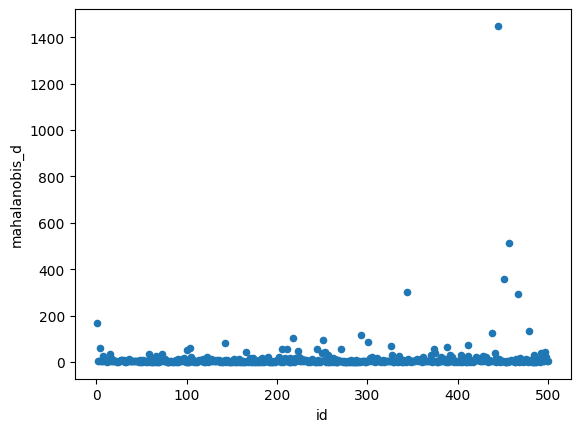

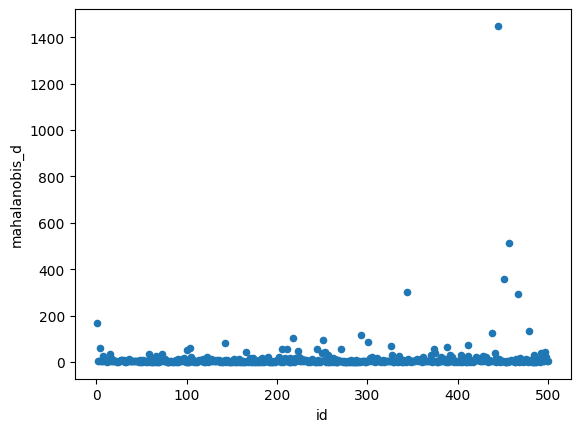

In [50]:
df_creditos.plot.scatter(x= 'id', y = 'mahalanobis_d')
plt.show()

Identificamos ao menos 5 outliers entre o 'id' 400 so 500

Agora vamos para o tratamento

Categorização da variável

In [53]:
df_creditos['outras_div_cat'] = pd.qcut(df_creditos['outras_div'],
                                        q=4,
                                        labels = ['baixa', 'baixa-media', 'media-alta', 'alta'])

In [54]:
df_creditos[['id', 'idade', 'outras_div', 'outras_div_cat']].head()

,id,idade,outras_div,outras_div_cat
0,1,41,0.598029,alta
1,2,27,0.293935,alta
2,3,40,-0.257047,media-alta
3,4,41,-0.663509,baixa
4,5,24,0.010917,media-alta


Não há mais efeito dos outliers. As categorias foram criadas.

Agora vamos Windsorizar

Obter percentis

In [55]:
df_creditos['outras_div'].quantile([0.05, 0.9])

0.05   -0.796136
0.90    1.281788
Name: outras_div, dtype: float64